In [1]:
# DON"T FORGET TO REMOVE HUMIDITY OVER 100
# And check against the example notebook

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import keys
from config import w_api_key
from config import gkey

# Import citipy module
# Be sure to be in PythonData where this installed to have this work
from citipy import citipy

In [3]:
# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities

572

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
farenheit = "units=imperial" #imperial
city = cities[2]


# Build query URL
query_url = url + "appid=" + w_api_key + "&q=" + city + "&units=imperial"
# Hooray!  I'm talking to the data source and my call is working.

In [5]:
# Look at sample results to set up directions to pull specific values in for loop
city_data_test = requests.get(query_url).json()
city_data_test

{'coord': {'lon': 1.7889, 'lat': 12.0708},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 80.64,
  'feels_like': 72.36,
  'temp_min': 80.64,
  'temp_max': 80.64,
  'pressure': 1009,
  'humidity': 14,
  'sea_level': 1009,
  'grnd_level': 978},
 'visibility': 10000,
 'wind': {'speed': 7.16, 'deg': 62},
 'clouds': {'all': 0},
 'dt': 1613249962,
 'sys': {'country': 'BF', 'sunrise': 1613196915, 'sunset': 1613239144},
 'timezone': 0,
 'id': 2361373,
 'name': 'Diapaga',
 'cod': 200}

In [6]:
# Set up dataframe to hold data from Open Weather

weather_data = pd.DataFrame({
    "City": cities
})

# Add empty columns to fill
weather_data["Lat"] = ""
weather_data["Long"] = ""
weather_data["Max Temp"] = ""
weather_data["Humidity"] = ""
weather_data["Cloudiness"] = ""
weather_data["Wind Speed"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""

# weather_data

In [7]:
# Set up a for loop to go through the weather_data dataframe to look for data for each city

base_url = url + "appid=" + w_api_key + "&units=imperial" + "&q=" 

for index, row in weather_data.iterrows():
    
    # Get the city name from the df
    name = row["City"]
    
    # Add city to url
    print(f"Retrieving data for {index}: {name}.")
    response = requests.get(base_url + name).json()
    
#     print(response)
    
    # Extract data
    # Not sure why I did this, but I'm not inclined to undo it after having run all my data already
    # This would not be necessary and I could just use response instead ot results
    results = response
#     print(results["coord"]["lat"])
    
    try:
#         print("Proof of entry into try block")
        weather_data.loc[index, "Lat"] = results["coord"]["lat"]
        weather_data.loc[index, "Long"] = results["coord"]["lon"]
        weather_data.loc[index, "Max Temp"] = results["main"]["temp_max"]
        weather_data.loc[index, "Humidity"] = results["main"]["humidity"]
        weather_data.loc[index, "Cloudiness"] = results["clouds"]["all"]
        weather_data.loc[index, "Wind Speed"] = results["wind"]["speed"]
        weather_data.loc[index, "Country"] = results["sys"]["country"]
        weather_data.loc[index, "Date"] = results["dt"]
        
        print(f"Retrieving results for {name}. Loading stats.")
        
    except KeyError:
        print(f"{name} not found.")
        # Place an NaN to find and remove the rows with no data later
        weather_data.loc[index, "Lat"] = np.nan
        pass
    
    time.sleep(1)


Retrieving data for 0: saskylakh.
Retrieving results for saskylakh. Loading stats.
Retrieving data for 1: kapaa.
Retrieving results for kapaa. Loading stats.
Retrieving data for 2: diapaga.
Retrieving results for diapaga. Loading stats.
Retrieving data for 3: ushuaia.
Retrieving results for ushuaia. Loading stats.
Retrieving data for 4: rundu.
Retrieving results for rundu. Loading stats.
Retrieving data for 5: butaritari.
Retrieving results for butaritari. Loading stats.
Retrieving data for 6: jijiga.
Retrieving results for jijiga. Loading stats.
Retrieving data for 7: puerto ayora.
Retrieving results for puerto ayora. Loading stats.
Retrieving data for 8: hilo.
Retrieving results for hilo. Loading stats.
Retrieving data for 9: busselton.
Retrieving results for busselton. Loading stats.
Retrieving data for 10: east london.
Retrieving results for east london. Loading stats.
Retrieving data for 11: hovd.
Retrieving results for hovd. Loading stats.
Retrieving data for 12: taolanaro.
taola

Retrieving data for 103: katherine.
Retrieving results for katherine. Loading stats.
Retrieving data for 104: sibolga.
Retrieving results for sibolga. Loading stats.
Retrieving data for 105: samusu.
samusu not found.
Retrieving data for 106: thompson.
Retrieving results for thompson. Loading stats.
Retrieving data for 107: springbok.
Retrieving results for springbok. Loading stats.
Retrieving data for 108: arlit.
Retrieving results for arlit. Loading stats.
Retrieving data for 109: lyuban.
Retrieving results for lyuban. Loading stats.
Retrieving data for 110: kamenskoye.
kamenskoye not found.
Retrieving data for 111: jamestown.
Retrieving results for jamestown. Loading stats.
Retrieving data for 112: upernavik.
Retrieving results for upernavik. Loading stats.
Retrieving data for 113: mandan.
Retrieving results for mandan. Loading stats.
Retrieving data for 114: mahebourg.
Retrieving results for mahebourg. Loading stats.
Retrieving data for 115: gameza.
Retrieving results for gameza. Lo

Retrieving data for 203: ilulissat.
Retrieving results for ilulissat. Loading stats.
Retrieving data for 204: okato.
Retrieving results for okato. Loading stats.
Retrieving data for 205: doha.
Retrieving results for doha. Loading stats.
Retrieving data for 206: axim.
Retrieving results for axim. Loading stats.
Retrieving data for 207: vostok.
Retrieving results for vostok. Loading stats.
Retrieving data for 208: pangody.
Retrieving results for pangody. Loading stats.
Retrieving data for 209: damaturu.
Retrieving results for damaturu. Loading stats.
Retrieving data for 210: sept-iles.
Retrieving results for sept-iles. Loading stats.
Retrieving data for 211: vernon.
Retrieving results for vernon. Loading stats.
Retrieving data for 212: north platte.
Retrieving results for north platte. Loading stats.
Retrieving data for 213: muswellbrook.
Retrieving results for muswellbrook. Loading stats.
Retrieving data for 214: tual.
Retrieving results for tual. Loading stats.
Retrieving data for 215:

Retrieving data for 305: labuhan.
Retrieving results for labuhan. Loading stats.
Retrieving data for 306: colac.
Retrieving results for colac. Loading stats.
Retrieving data for 307: gat.
Retrieving results for gat. Loading stats.
Retrieving data for 308: sawai madhopur.
Retrieving results for sawai madhopur. Loading stats.
Retrieving data for 309: pincher creek.
Retrieving results for pincher creek. Loading stats.
Retrieving data for 310: general pico.
Retrieving results for general pico. Loading stats.
Retrieving data for 311: hami.
Retrieving results for hami. Loading stats.
Retrieving data for 312: valparaiso.
Retrieving results for valparaiso. Loading stats.
Retrieving data for 313: ucluelet.
Retrieving results for ucluelet. Loading stats.
Retrieving data for 314: gumla.
Retrieving results for gumla. Loading stats.
Retrieving data for 315: sitka.
Retrieving results for sitka. Loading stats.
Retrieving data for 316: saldanha.
Retrieving results for saldanha. Loading stats.
Retrievi

Retrieving data for 404: maine-soroa.
Retrieving results for maine-soroa. Loading stats.
Retrieving data for 405: jumla.
Retrieving results for jumla. Loading stats.
Retrieving data for 406: davila.
Retrieving results for davila. Loading stats.
Retrieving data for 407: hit.
Retrieving results for hit. Loading stats.
Retrieving data for 408: palmer.
Retrieving results for palmer. Loading stats.
Retrieving data for 409: kuklis.
Retrieving results for kuklis. Loading stats.
Retrieving data for 410: villa carlos paz.
Retrieving results for villa carlos paz. Loading stats.
Retrieving data for 411: thunder bay.
Retrieving results for thunder bay. Loading stats.
Retrieving data for 412: wajima.
Retrieving results for wajima. Loading stats.
Retrieving data for 413: vydrino.
Retrieving results for vydrino. Loading stats.
Retrieving data for 414: vila franca do campo.
Retrieving results for vila franca do campo. Loading stats.
Retrieving data for 415: traverse city.
Retrieving results for traver

Retrieving data for 504: anloga.
Retrieving results for anloga. Loading stats.
Retrieving data for 505: hambantota.
Retrieving results for hambantota. Loading stats.
Retrieving data for 506: saint-augustin.
Retrieving results for saint-augustin. Loading stats.
Retrieving data for 507: natitingou.
Retrieving results for natitingou. Loading stats.
Retrieving data for 508: dornbirn.
Retrieving results for dornbirn. Loading stats.
Retrieving data for 509: najran.
Retrieving results for najran. Loading stats.
Retrieving data for 510: houma.
Retrieving results for houma. Loading stats.
Retrieving data for 511: bambanglipuro.
Retrieving results for bambanglipuro. Loading stats.
Retrieving data for 512: witrivier.
witrivier not found.
Retrieving data for 513: yavaros.
Retrieving results for yavaros. Loading stats.
Retrieving data for 514: belmonte.
Retrieving results for belmonte. Loading stats.
Retrieving data for 515: leavenworth.
Retrieving results for leavenworth. Loading stats.
Retrieving

In [8]:
weather_data.head(100)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.083,-24.43,79,100,3.31,RU,1613249962
1,kapaa,22.0752,-159.319,78.8,65,40,13.8,US,1613249755
2,diapaga,12.0708,1.7889,80.64,14,0,7.16,BF,1613249965
3,ushuaia,-54.8,-68.3,42.8,87,75,4,AR,1613249966
4,rundu,-17.9333,19.7667,64,77,89,4,NA,1613249967
...,...,...,...,...,...,...,...,...,...
95,dikson,73.5069,80.5464,-21.26,87,100,12.17,RU,1613250078
96,toguchin,55.2353,84.3858,-2.78,88,96,7.31,RU,1613250080
97,longyearbyen,78.2186,15.6401,8.6,56,75,13.8,SJ,1613250081
98,cayenne,4.9333,-52.3333,82.4,74,40,12.66,GF,1613250082


In [9]:
weather_data.dropna(inplace=True)
weather_data.reset_index(drop=True, inplace=True)
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.083,-24.43,79,100,3.31,RU,1613249962
1,kapaa,22.0752,-159.319,78.8,65,40,13.8,US,1613249755
2,diapaga,12.0708,1.7889,80.64,14,0,7.16,BF,1613249965
3,ushuaia,-54.8,-68.3,42.8,87,75,4,AR,1613249966
4,rundu,-17.9333,19.7667,64,77,89,4,NA,1613249967
...,...,...,...,...,...,...,...,...,...
525,manjacaze,-24.7117,33.8828,75.81,93,100,7.18,MZ,1613250603
526,shelburne,44.0787,-80.2041,12,67,100,10,CA,1613250604
527,tulsipur,28.131,82.2973,56.84,51,96,3.96,NP,1613250606
528,maihar,24.2667,80.75,57.92,44,0,2.28,IN,1613250607


In [27]:
# Export weather_data to csv
# Update with full data set later (updated)

weather_data.to_csv("City_Weather_data.csv", index=False)

In [33]:
# Lean charts on csv to avoid rerunning everything to fix small things
weather_data_2 = pd.read_csv("City_Weather_data.csv")
weather_data_2

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,-24.43,79,100,3.31,RU,1613249962
1,kapaa,22.0752,-159.3190,78.80,65,40,13.80,US,1613249755
2,diapaga,12.0708,1.7889,80.64,14,0,7.16,BF,1613249965
3,ushuaia,-54.8000,-68.3000,42.80,87,75,4.00,AR,1613249966
4,rundu,-17.9333,19.7667,64.00,77,89,4.00,NaN,1613249967
...,...,...,...,...,...,...,...,...,...
525,manjacaze,-24.7117,33.8828,75.81,93,100,7.18,MZ,1613250603
526,shelburne,44.0787,-80.2041,12.00,67,100,10.00,CA,1613250604
527,tulsipur,28.1310,82.2973,56.84,51,96,3.96,NP,1613250606
528,maihar,24.2667,80.7500,57.92,44,0,2.28,IN,1613250607


In [28]:
date = (weather_data.iloc[0]["Date"])
# date = date.astype(str)
date_converted = time.localtime(date)
date_converted
year = date_converted[0]
month = date_converted[1]
day = date_converted[2]

# print(f"{month, day, year}")

(2, 13, 2021)


In [13]:
# Set up scatterplots and linear regressions

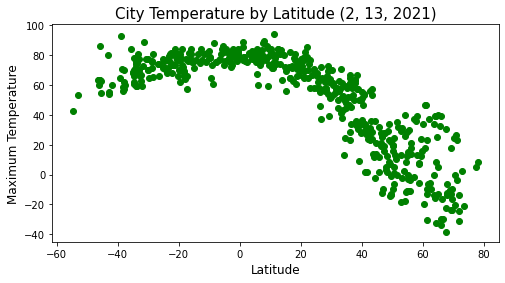

In [29]:
# Temperature vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.figure(figsize=(8, 4))

plt.scatter(x, temp_y, color="green")
plt.ylabel("Maximum Temperature", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"City Temperature by Latitude {month, day, year}", fontsize=15)
# plt.show()

plt.savefig("Images/total_temp.png")

The graph above shows the relationship between global latitude positon and temperature in each of the cities in the dataset. We can see through the shape of the data that city temperatures rise as latitude approaches 0 from -60 degrees latitude, but appear to decrease more steeply as they increase from 0.  Temperatures at 60 degrees latitude appear much lower than at -60 degrees latitude, indicating there there is more at play than simply latitude or distance from the equator.  This makes sense when taking into account the tilt of the Earth's axis.  The lower temperatures at latitudes further north also make sense given the quantity of land closer to the Arctic Circle and the current winter season in the northern hemisphere.

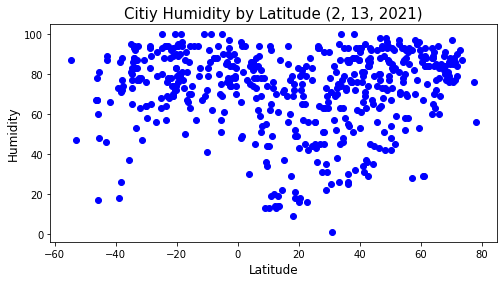

In [30]:
# Humidity vs Latitude
humid_y = weather_data["Humidity"]

plt.figure(figsize=(8, 4))

plt.plot(x, humid_y, "bo")
plt.ylabel("Humidity", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Citiy Humidity by Latitude {month, day, year}", fontsize=15)
# plt.show()

plt.savefig("Images/total_humidity.png")

In analyzing the City Humidity vs Latitude graph, while we can see there is a cluster of high humidity cities between 60 and 80 degrees latitude, there is no obvious relationship between latitude and humidity otherwise.  Humidity looks to generally stay above 60% with little striking increase or decrease as latitude changes.  This allows us to infer that latitude is not a good indicator or predicter of humidity.

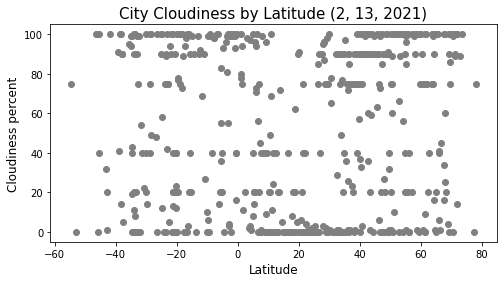

In [31]:
# Cloudiness vs Latitude
cloud_y = weather_data["Cloudiness"]

plt.figure(figsize=(8, 4))

plt.scatter(x, cloud_y, color="gray")
plt.ylabel("Cloudiness percent", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"City Cloudiness by Latitude {month, day, year}", fontsize=15)
# plt.show()

plt.savefig("Images/total_cloudiness.png")

This is an interesting one, as it shows that there is a clustering of cities with either total cloud cover, or no cloud cover at all, but it appears equally weighted across latitude.  Once again, it does not appear that there is any strong relationship between latitude and cloudiness.  Rather, one might want to infer that it is more likely that a city will have either a cloud-free day or a very cloudy day, but the density of the cities clustered at 0 and 100% cloudiness distract from the number of cities that are distributed relatively equally between those extremes.  There do appear to be other clusters at 20%, 40%, and 75% cloud cover, but again, these clusters cross all latitutes.

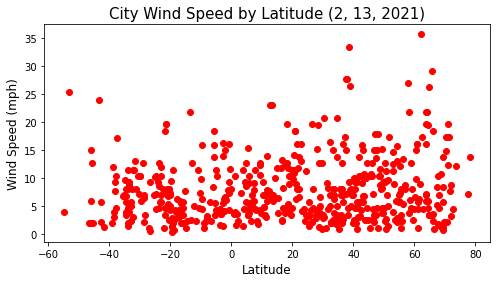

In [60]:
# Wind Speed by Latitude
wind_y = weather_data["Wind Speed"]

plt.figure(figsize=(8, 4))

plt.scatter(x, wind_y, color="red")
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"City Wind Speed by Latitude {month, day, year}", fontsize=15)
# plt.show()

plt.savefig("Images/total_wind.png")

The scatterplot City Wind Speed by Latitude looks like a relatively equal distribution of speeds below 20 mph across all latitutes, indicating that latitude is not a good predictor of wind speed in a given city.

In [51]:
# Separate dataframes by hemispheres
northern_weather = weather_data_2.loc[weather_data_2["Lat"] >= 0]
# northern_weather

southern_weather = weather_data_2.loc[weather_data_2["Lat"] <= 0]
# southern_weather

## Temperature Regressions

The correlation between latitude and temperature in the Southern Hemisphere is 0.58


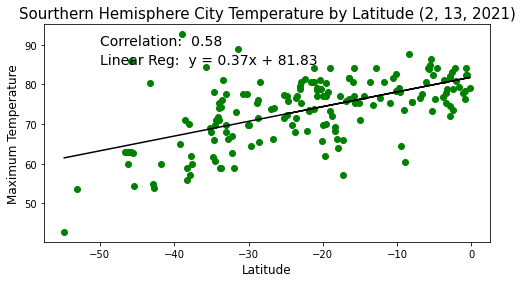

In [52]:
# Southern Temp vs Latitude
south_x = southern_weather["Lat"]
south_temp = southern_weather["Max Temp"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_temp, color="green")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate 
correlation = st.pearsonr(south_x, south_temp)
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,90), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,85), fontsize=14, color="black")

plt.ylabel("Maximum Temperature", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Sourthern Hemisphere City Temperature by Latitude {month, day, year}", fontsize=15)
plt.tight_layout

# plt.show()
plt.savefig("Images/southern_temp.png")

We can see here that the southern hemisphere data represents the portion of the overall data in which there is a gradual increase in city temperature as latitude approaches 0 degrees.  The correlation is .58, which is not incredibly strong, but still indicates a useful starting tool to predict temperature in a given city in the southern hemisphere based on its latitude.

The correlation between latitude and temperature in the Northern Hemisphere is -0.88


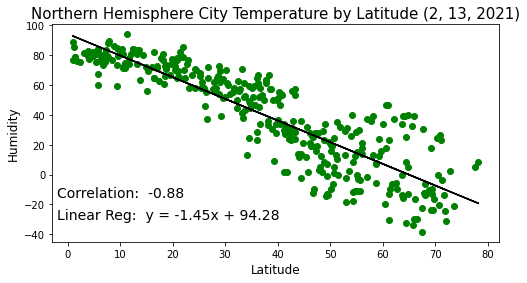

In [39]:
# Northern Temp vs Latitude
north_x = northern_weather["Lat"]
north_temp = northern_weather["Max Temp"]

plt.figure(figsize=(8, 4))

correlation = st.pearsonr(north_x, north_temp)
print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_temp)
regress_values = north_x * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(north_x, north_temp, color="green")
plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-2,-15), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-2,-30), fontsize=14, color="black")

plt.ylabel("Humidity", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Northern Hemisphere City Temperature by Latitude {month, day, year}", fontsize=15)

# plt.show()
plt.savefig("Images/northern_temp.png")

As we observed in the overall data, city temperature does increase as latitude approaches 0 and decreases as it increases from 0 degrees.  For southern cities, we observed this as a positive correlation and it is not surprising to see a similar, strong negative correlation here.  The further away from the equator, the colder the city temperature.

## Humidity Regression

The correlation between latitude and humidity in the Southern Hemisphere is 0.23


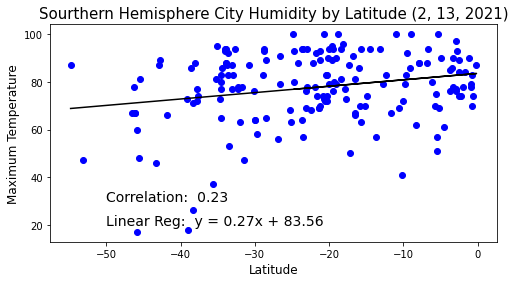

In [53]:
# Southern Humidity vs Latitude
south_x = southern_weather["Lat"]
south_humid = southern_weather["Humidity"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_humid, color="blue")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_humid)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_humid)
print(f"The correlation between latitude and humidity in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,30), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,20), fontsize=14, color="black")

plt.ylabel("Maximum Temperature", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Sourthern Hemisphere City Humidity by Latitude {month, day, year}", fontsize=15)

# plt.show()
plt.savefig("Images/southern_humidity.png")

While we can see that humidity in cities in the southern hemisphere generally have humidty rates over 60%, we can also see that the correlation is only 0.23, which is not terribly strong.  It is interesting to note that there is an increase in number of cities as latitude approaches 0, which may also be a factor in influencing the correlation between latitude and humidity.

The correlation between latitude and humidity in the Northern Hemisphere is 0.32


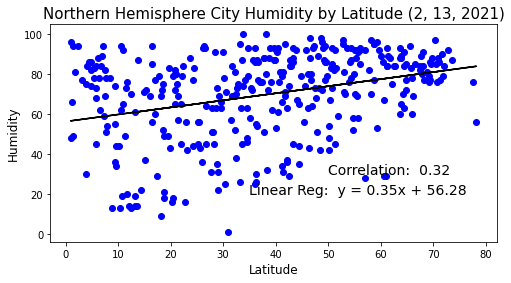

In [54]:
# Northern Humidity vs Latitude
north_x = northern_weather["Lat"]
north_humid = northern_weather["Humidity"]

plt.figure(figsize=(8, 4))

plt.scatter(north_x, north_humid, color="blue")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_humid)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_humid)
print(f"The correlation between latitude and humidity in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (50,30), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (35,20), fontsize=14, color="black")

plt.ylabel("Humidity", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Northern Hemisphere City Humidity by Latitude {month, day, year}", fontsize=15)

# plt.show()
plt.savefig("Images/northern_humidity.png")

Once again, we are seeing a weak correlation between city latitude and humidity.  With a correlation of 0.32, there is a small increase in humidty as latitude increases from 0 degrees, but it is not strong enough to serve as a good predictive tool.

## Cloudiness Regressions

The correlation between latitude and cloudiness in the Southern Hemisphere is 0.06


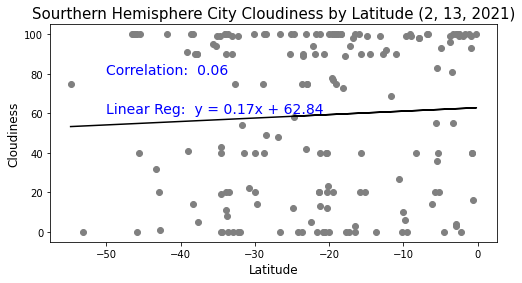

In [55]:
# Southern cloudiness vs Latitude
south_x = southern_weather["Lat"]
south_cloud = southern_weather["Cloudiness"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_cloud, color="gray")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_cloud)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_cloud)
print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,80), fontsize=14, color="blue")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,60), fontsize=14, color="blue")

plt.ylabel("Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Sourthern Hemisphere City Cloudiness by Latitude {month, day, year}", fontsize=15)

# plt.show()
plt.savefig("Images/southern_cloudiness.png")

Much like the overall data, we can see that there are clusters of cities at 0%, 40%, 75%, and 100% cloudiness.  The distribution of cities across latitudes appears fairly even at each of those points, but once again we see that a higher quantity of cities closer to a latitude of 0 may be impacting the correlation.  At 0.06, there is essentially no correlation, which means that southern latitude is not a good predictor of cloudiness of a given city.

The correlation between latitude and cloudiness in the Northern Hemisphere is 0.3


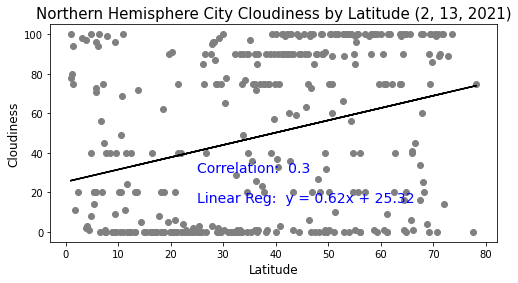

In [56]:
# Northern Cloudiness vs Latitude
north_x = northern_weather["Lat"]
north_cloud = northern_weather["Cloudiness"]

plt.figure(figsize=(8, 4))

plt.scatter(north_x, north_cloud, color="gray")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_cloud)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_cloud)
print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (25,30), fontsize=14, color="blue")
plt.annotate(f'Linear Reg:  {line_eq}', (25,15), fontsize=14, color="blue")

plt.ylabel("Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Northern Hemisphere City Cloudiness by Latitude {month, day, year}", fontsize=15)

# plt.show()
plt.savefig("Images/northern_cloudiness.png")

In the northern hemisphere, we are also seeing a weak correlation between latitude and cloudiness.  As we can infer from the dispersal of data points on the scatterplot, latitude is not a good predictor of cloudiness in a given city in the northern hemisphere.

## Wind Speed Regressions

The correlation between latitude and wind speed in the Southern Hemisphere is -0.03


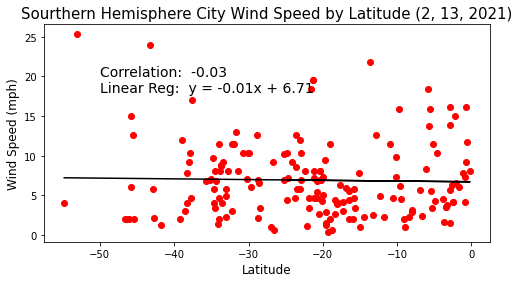

In [58]:
# Southern Wind Speed vs Latitude
south_x = southern_weather["Lat"]
south_wind = southern_weather["Wind Speed"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_wind, color="red")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_wind)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_wind)
print(f"The correlation between latitude and wind speed in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,20), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,18), fontsize=14, color="black")

plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Sourthern Hemisphere City Wind Speed by Latitude {month, day, year}", fontsize=15)

# plt.show()
plt.savefig("Images/southern_wind.png")

As we observed in the overall data, there does not appear to be a strong relationship between city latitude and wind speed.  A correlation of -0.03 upholds that observation, that latitude south of 0 degrees is not a good predictor of wind speed in a given city.

The correlation between latitude and wind speed in the Northern Hemisphere is 0.12


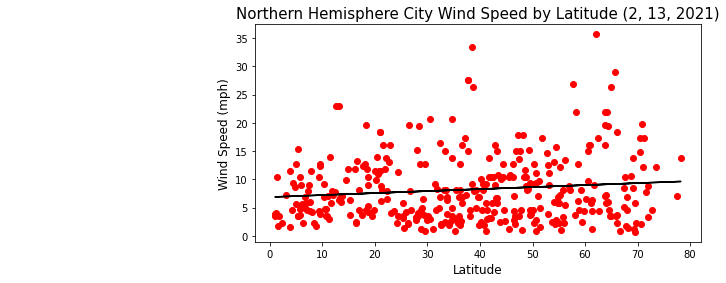

In [59]:
# Northern Wind Speed vs Latitude
north_x = northern_weather["Lat"]
north_wind = northern_weather["Wind Speed"]

plt.figure(figsize=(8, 4))

plt.scatter(north_x, north_wind, color="red")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_wind)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_wind)
print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,20), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,18), fontsize=14, color="black")

plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title(f"Northern Hemisphere City Wind Speed by Latitude {month, day, year}", fontsize=15)

# plt.show()
plt.savefig("Images/northern_wind.png")

Although the display of cities in the northern hemisphere by latitude and wind speed looks remarkably different from that of cities in the southern hemisphere, the correlation between latitude and wind speed is similarly weak at 0.12.  This means that it is not a good predictive tool for wind speed in northern cities either.

## Observable Trends in the Data

While the regressions for both the southern and northern hemisphere are similar in each of the four categories identified, they are not identical.  The volume of cities north of the equator may play a part in this, as there is simply a larger quantity of land mass in the northern hemisphere on which there can be cities, but the tilt of the Earth's axis may also be an influence.  Instead of dismissing these differences, we can use them to guide further discovery about global city location and weather.

Additionally, we must be mindful of the time at which this data was pulled.  In mid-February, the northern hemisphere is deep into winter, while the southern hemisphere is deep into summer.  We will see this bear out in the relationship between temperature and latitude, as the maximum daily temperature drops steeply the further north a city's latitude.  Were this data taken in July, we can infer that the demonstrated relationship would be the inverse, with temperatures dropping further south of 0 degrees latitute as the southern hemisphere experiences winter, and increasing further north as the northern hemisphere experiences summer.

Finally, we can see that overall, there is litle relationship between a city's weather and latitude beyond maximum daily temperature.  This tells us that at any location and temperatures, a city might experience cloudiness, clear skies, humidity, dry air, calm winds, or high wind speeds with little ability to predict the combination based on latitude alone.  There may be other ways to tie these weather data points together, but approaching them based only on their relationship to a city's latitude tells us very little, beyond an overall picture of the wide variety of weather experienced across the globe.